# Transformer
[Transformer 详解](https://wmathor.com/index.php/archives/1438/)

## 0.1 Transformer计算图（未看教程，个人理解，不一定全对）
**Transformer全流程图**
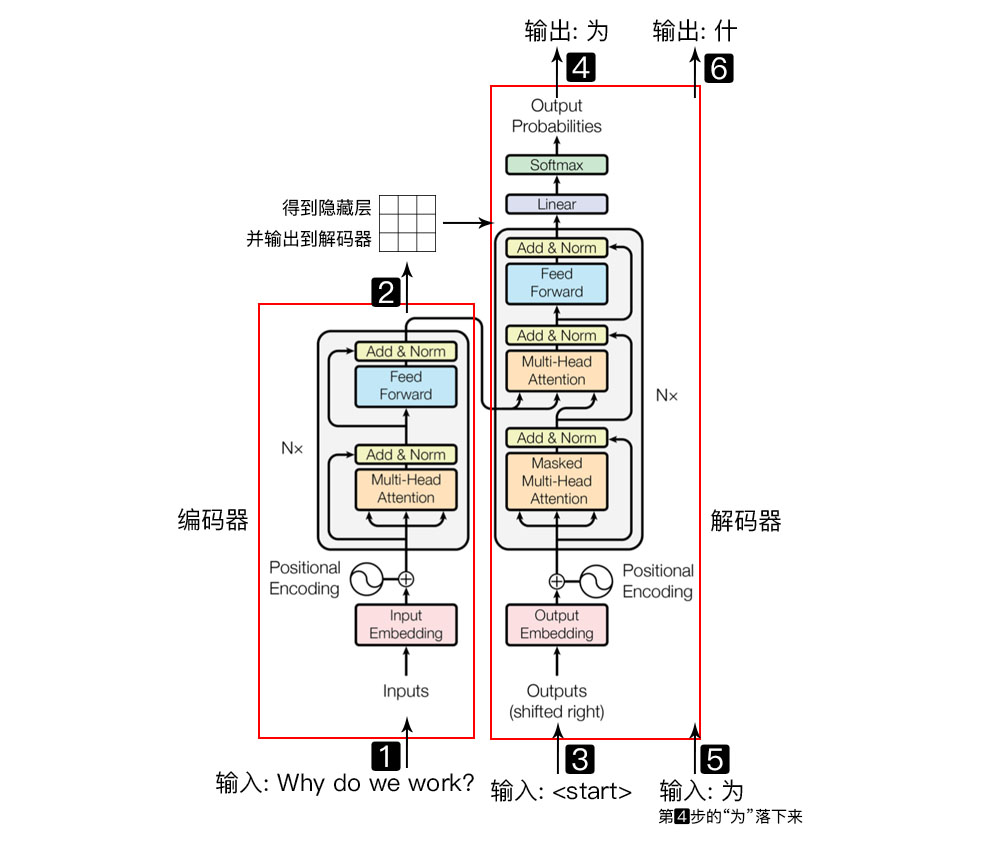
**自注意力机制**
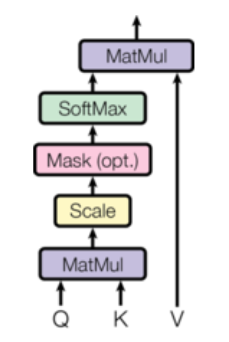

1. 词向量处理
    + 作用：将文本句子向量化
    + 输入：一组组句子（有问有答，分别用于Encoder和Decoder部分,模型训练好后实际使用时，应答部分的初始化结果为占位用的空字符向量）
    + 输出：一组组句子向量（问/答，分别用于Encoder和Decoder部分）
2. Embedding
    + 作用：将一维词向量转换成二维的词矩阵
    + 输入：一组组句子向量（问/答）
    + 输出：一组组句子矩阵（问/答）（矩阵的每一行都是一个词向量）
3. Postitional Encoding
    + 作用：为句子矩阵中的各个词添加位置信息
    + 输入：一组组句子矩阵（问/答）
    + 输出：添加了位置信息的句子矩阵（问/答）
4. Multi-Head Attention
    + 作用：多头注意力模型训练句子矩阵，主要内容有多头机制、QKV计算、打分机制
    + 输入：一组组的句子矩阵（问/答）
    + 输出：一组组的句子矩阵（问/答）
5. 多头机制
    + 作用：使用多个Head Attention给句子打分，并纵向拼接，使用一个独特的算法将分数合并，个人认为类型随机森林这类投票机制
    + 输入：一组组的句子矩阵（问/答）
    + 输出：一组组的句子矩阵的分数（问/答）
6. QKV计算
    + 作用：QKV分别为注意力、键、值，是建立的三个超参数，用于拟合输入的词向量
    + 输入：词向量
    + 输出：用于打分的矩阵
7. 打分机制
    + 作用：将QKV计算的结果转化成分数，表示当前词之后是某个词的概率
    + 输入：用于打分的矩阵
    + 输出：分数向量
8. Encoder-Decoder Multi-Head Attention    
    + 作用：在Decoder模型中独有的使用Encoder的QK与Decoder的V一起训练的多头注意力模型
    + 输入：一组组的句子矩阵（答）
    + 输出：分数向量（答）
9. Mask Multi-Head Attention    
    + 作用：在Decoder模型中，预测词的时候是一个词一个词预测的，因此要保证预测前面的词的时候不能受到后面的词的影响
    + 输入：一组组的句子矩阵（答）
    + 输出：分数向量（答）
10. Add & Norm(作用描述不准确，输入输出不确定)
    + 作用：将多头的计算结果加权求和并归一化，输出为真正的分数，再与原句配对，形成句中每个词之后跟某个词的概率矩阵（不一定准确）
    + 输入：分数向量矩阵
    + 输出：词/分数向量矩阵
11. Feed Forward
    + 作用：前向反馈
    + 输入：句子矩阵
    + 输出：句子矩阵
12. Linear（不准确）
    + 作用：线性层，将模型拟合结果转化成句子概率矩阵
    + 输入：
    + 输出：
13. softmax
    + 作用：将结果转化为词概率
    + 输入：
    + 输出：
    
模型增强：
+ Dropout：随机消除模型训练过程中的部分向量的部分位，增强模型的泛化能力

模型技术：
+ mask（掩码技术）：因为句子长度不同需要按照最长句子补全，因此需要使用掩码消除补全部分对模型结果的影响，即：让补全的部分不参与运算

## 0.2 Positional Encoding
[https://wmathor.com/index.php/archives/1453/](https://wmathor.com/index.php/archives/1453/)

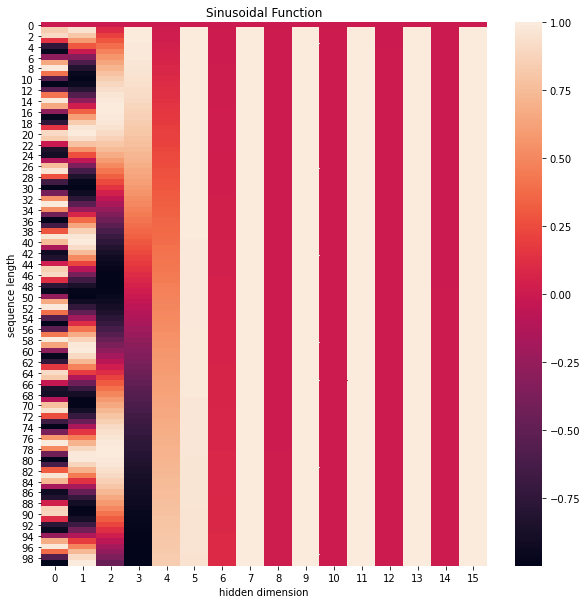

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

def get_positional_encoding(max_seq_len, embed_dim):
    # 初始化一个positional encoding
    # embed_dim: 字嵌入的维度
    # max_seq_len: 最大的序列长度
    positional_encoding = np.array([
        [pos / np.power(10000, 2 * i / embed_dim) for i in range(embed_dim)]
        if pos != 0 else np.zeros(embed_dim) for pos in range(max_seq_len)])
    positional_encoding[1:, 0::2] = np.sin(positional_encoding[1:, 0::2])  # dim 2i 偶数
    positional_encoding[1:, 1::2] = np.cos(positional_encoding[1:, 1::2])  # dim 2i+1 奇数
    # print(positional_encoding)
    return positional_encoding

positional_encoding = get_positional_encoding(max_seq_len=100, embed_dim=16)
plt.figure(figsize=(10,10))
sns.heatmap(positional_encoding)
plt.title("Sinusoidal Function")
plt.xlabel("hidden dimension")
plt.ylabel("sequence length");

Text(0, 0.5, 'Period of Positional Encoding')

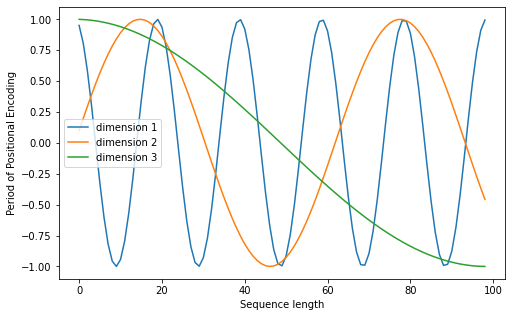

In [3]:
plt.figure(figsize=(8, 5))
plt.plot(positional_encoding[1:, 1], label="dimension 1")
plt.plot(positional_encoding[1:, 2], label="dimension 2")
plt.plot(positional_encoding[1:, 3], label="dimension 3")
plt.legend()
plt.xlabel("Sequence length")
plt.ylabel("Period of Positional Encoding")

In [4]:
import torch
import numpy as np

def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0


mask = subsequent_mask(3)
print(mask)
mask.unsqueeze(1)

tensor([[[ True, False, False],
         [ True,  True, False],
         [ True,  True,  True]]])


tensor([[[[ True, False, False],
          [ True,  True, False],
          [ True,  True,  True]]]])

## 1 模型复现
+ Linear & Softmax
    + class Generator(nn.Module)
+ N_layer Encoder & N_layer Decoder
    + class EncoderDecoder(nn.Module)
+ Encoder & Decoder
    + def clones(module, N)  # 模型克隆
    + class Encoder(nn.Module)
    + class Decoder(nn.Module)
+ sub Encoder & sub Decoder
    + class EncoderLayer(nn.Module)
    + class DecoderLayer(nn.Module)
+ mask
    + def subsequent_mask(size)
+ add & Norm
    + class LayerNorm(nn.Module)
    + class SublayerConnection(nn.Module)  # 子层连接层
+ Multi-Head Attention
    + class MultiHeadedAttention(nn.Module)
+ attention
    + def attention(query, key, value, mask=None, dropout=None)
+ Feed Forward
    + class PositionwiseFeedForward(nn.Module)
+ embedding
    + class Embeddings(nn.Module)
+ positional（位置编码）
    + class PositionalEncoding(nn.Module)
+ 数据预处理
    + class Voc()
+ 完整模型
    + def make_model(src_vocab, tgt_vocab, N=6, d_model=512, d_ff=2048, h=8, dropout=0.1)
+ 模型训练
    + class Batch
    + def run_epoch(data_iter, model, loss_compute)
    + def batch_size_fn(new, count, sofar)  # 批处理（没看懂）
    + class NoamOpt  # 优化器
    + class LabelSmoothing(nn.Module)  # 正则化
    + class MultiGPULossCompute  # 多GPU
    + def draw(data, x, y, ax)  # 注意力可视化

### 1.1 加载包

In [5]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import math, copy, time
from torch.autograd import Variable
import matplotlib.pyplot as plt
import seaborn
seaborn.set_context(context="talk")

### 1.2 Linear & Softmax

In [6]:
class Generator(nn.Module):
    """线性层与softmax层"""

    def __init__(self, d_model, vocab):
        """
        :param d_model: 模型一维长度，一般为512，方便多头计算
        :param vocab: 词典中的词数量
        """
        super(Generator, self).__init__()
        self.proj = nn.Linear(d_model, vocab)

    def forward(self, x):
        """
        max(a*x+b),将Transformer的输出转换成概率词出现的概率
        :param x: decoder生成的Transformer的输出，size(d_model, N)
        :return:
        """
        return F.log_softmax(self.proj(x), dim=-1)

### 1.3 编码器与解码器结构

In [7]:
class EncoderDecoder(nn.Module):
    """一个标准的编码器-解码器架构。这是很多其他模型的基础。"""
    def __init__(self, encoder, decoder, src_embed, tgt_embed, generator):
        """
        :param encoder: 编码器模型
        :param decoder: 解码器模型
        :param src_embed: 输入端嵌入层模型
        :param tgt_embed: 输出端嵌入层模型
        :param generator: Generator, 线性层与softmax层
        """
        super(EncoderDecoder, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.src_embed = src_embed
        self.tgt_embed = tgt_embed
        self.generator = generator

    def forward(self, src, src_mask, tgt, tgt_mask):
        """
        :param src: 句子向量，输入文本
        :param src_mask: 输入文本的掩码
        :param tgt: 句子向量，输出文本
        :param tgt_mask: 输出文本的掩码
        :return:
        """
        return self.decoder(self.encode(src, src_mask),
                            src_mask, tgt, tgt_mask)

    def encode(self, src, src_mask):
        return self.encoder(self.src_embed(src), src_mask)

    def decode(self, memory, src_mask, tgt, tgt_mask):
        """
        :param memory: 当前Transformer模型中即为self.encode的输出，seq2seq中可能还会再加入注意力模型等
        :param src_mask: 
        :param tgt: 
        :param tgt_mask: 
        :return: 
        """
        return self.decoder(self.tgt_embed(tgt), memory, src_mask, tgt_mask)

### 1.4 标准化与子层连接
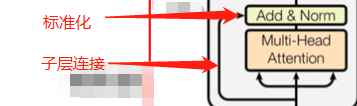

In [8]:
class LayerNorm(nn.Module):
    """层标准化，add & Norm
    公式：a * (x-mean_x) / (std_x + eps) + b
    引入超参数a和b，向量长度与特征数量相同
    """
    def __init__(self, features, eps=1e-6):
        """
        :param features: 特征数量
        :param eps: 为保证数值稳定性（分母不能趋近或取0）,给分母加上的值。默认为1e-5
        """
        super(LayerNorm, self).__init__()
        self.a_2 = nn.Parameter(torch.ones(features))
        self.b_2 = nn.Parameter(torch.zeros(features))
        self.eps = eps

    def forward(self, x: torch.Tensor):
        """
        :param x: 嵌入后的句子矩阵，三个维度，逐个句子>逐个词>嵌入后的词矩阵
        :return:
        """
        # 由于是对嵌入后的句子矩阵进行计算，因此实际是对句子矩阵中的每个词矩阵计算，
        # 因此要选择句子对应的维度后再计算
        mean = x.mean(-1, keepdim=True)
        std = x.std(-1, keepdim=True)
        return self.a * (x - mean) / (std + self.eps) + self.b_2

In [9]:
class SubLayerConntction(nn.Module):
    """在层规范之后的残差连接。
    注意，为了代码的简单性，规范是第一个，而不是最后一个。
    包含标准化模型
    """
    def __init__(self, size, dropout):
        super(SubLayerConntction, self).__init__()
        self.norm = LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer):
        """将剩余连接应用到相同大小的任何子层。"""
        return x + self.dropout(sublayer(self.norm(x)))

### 1.5 编码器

In [10]:
def clones(module, N):
    """模型克隆"""
    # 产生N个相同的层，N=6
    # ModuleList 可以像常规Python列表一样编制索引，包含的模块已正确注册
    # copy.copy 浅拷贝 只拷贝父对象，不会拷贝对象的内部的子对象
    # copy.deepcopy 深拷贝 拷贝对象及其子对象
    return nn.ModuleList([copy.deepcopy(module) for _ in range(N)])

In [11]:
class Encoder(nn.Module):
    """编码器模型，内部包含多层编码器"""
    def __init__(self, layer, N):
        """
        :param layer: 编码器
        :param N: 编码器层数
        """
        super(Encoder, self).__init__()
        self.layers = clones(layer, N)
        # 归一化层 LayerNorm(normalized_shape, eps=1e-05, elementwise_affine=True)
        # normalized_shape 输入尺寸  [∗×normalized_shape[0]×normalized_shape[1]×…×normalized_shape[−1]]
        # eps-为保证数值稳定性（分母不能趋近或取0）,给分母加上的值。默认为1e-5
        # elementwise_affine 布尔值，当设为true，给该层添加可学习的仿射变换参数
        self.norm = LayerNorm(layer.size)

    def forward(self, x, mask):
        for layer in self.layers:
            x = layer(x, mask)
        return self.norm(x)

In [12]:
class EncoderLayer(nn.Module):
    """编码器的一层模型，执行顺序为：多头注意力模型>子层连接>前向反馈>子层连接"""
    def __init__(self, size, self_attn, feed_forward, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = self_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SubLayerConntction(size, dropout), 2)
        self.size = size

    def forward(self, x, mask):
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, mask))
        return self.sublayer[1](x, self.feed_forward)

### 1.6 解码器

In [13]:
class Decoder(nn.Module):
    """解码器，解码器中forward方法需要传入Decoder的输出"""
    def __init__(self, layer, N):
        super(Decoder, self).__init__()
        self.layers = clones(layer, N)
        self.norm = LayerNorm(layer.size)

    def forward(self, x, memory, src_mask, tgt_mask):
        """
        :param x: 预测结果
        :param memory: Encoder输出
        :param src_mask: Encoder mask
        :param tgt_mask: 预测结果 mask
        :return: 
        """
        for layer in self.layers:
            x = layer(x, memory, src_mask, tgt_mask)
        return self.norm(x)

In [14]:
class DecoderLayer(nn.Module):
    """解码器的一层模型，
    执行顺序为：自注意力>子层连接>Encoder-Decoder注意力>子层连接>前向反馈>子层连接"""
    def __init__(self, size, self_attn, src_attn, feed_forward, dropout):
        super(DecoderLayer, self).__init__()
        self.size = size
        self.self_attn = self_attn
        self.src_attn = src_attn
        self.feed_forward = feed_forward
        self.sublayer = clones(SubLayerConntction(size, dropout), 3)

    def forward(self, x, memory, src_mask, tgt_mask):
        m = memory
        x = self.sublayer[0](x, lambda x: self.self_attn(x, x, x, tgt_mask))
        x = self.sublayer[1](x, lambda x: self.src_attn(x, m, m, src_mask))
        return self.sublayer[2](x, self.feed_forward)

In [15]:
def subsequent_mask(size):
    """连续掩码，一个上半区为False,下半区为True的维度为(size,size)的矩阵"""
    attn_shape = (1, size, size)
    mask = np.triu(torch.ones(attn_shape), k=1).astype("uint8")
    return torch.from_numpy(mask) == 0

# subsequent_mask(4)

### 1.7 注意力算法
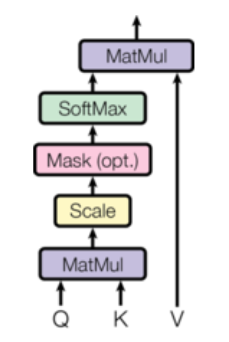

In [16]:
def attention(query: torch.Tensor, key: torch.Tensor, value: torch.Tensor, mask=None, dropout=None):
    """注意力算法: softmax(Q * K_t / sqrt(d_k)) * V
    K_t是K的转置；d_k是Q的size(-1);
    :param query: 注意力矩阵，三维矩阵
    :param key: 三维矩阵
    :param value: 三维矩阵
    :param mask: 掩码，在softmax前使用
    :param dropout: 在softmax后，乘value前使用，随机去除一些值
    :return: 
    """
    d_k = query.size(-1)
    scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(d_k)
    if mask is not None:
        scores = scores.masked_fill(mask == 0, -1e9)
    p_attn = F.softmax(scores, dim=-1)
    if dropout is not None:
        p_attn = dropout(p_attn)
    return torch.matmul(p_attn, value), p_attn

**多头注意力模型**
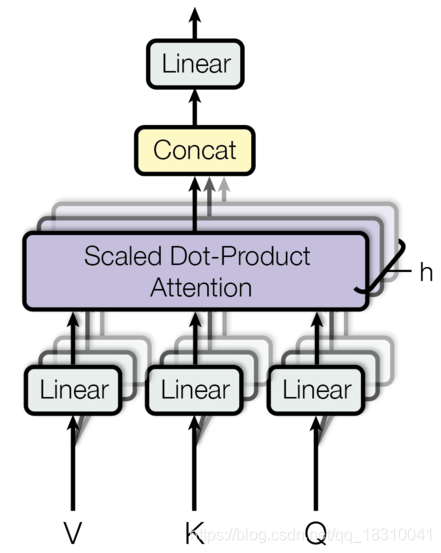

In [22]:
class MultiHeadedAttention(nn.Module):
    """多头注意力模型
    执行顺序：Q/K/V>Linear/Linear/Linear>attention>concat>Linear
    """
    def __init__(self, h, d_model, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()
        self.d_k = d_model // h
        self.h = h
        self.linears = clones(nn.Linear(d_model, d_model), 4)
        self.attn = None
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query, key, value, mask=None):
        if mask is not None:
            # 同样的掩码适用于所有的h头
            # 添加一个维度
            mask = mask.unsqueese(1)
        nbatches = query.size(0)
        # QKV分别进入线性层，并改变维度
        # zip会根据少的数组确定结果长度
        query, key, value = [l(x).view(nbatches, -1, self.h, self.d_k).transpose(1, 2)
                             for l, x in zip(self.linears, (query, key, value))]
        # 添加到注意力算法中计算
        x, self.attn = attention(query, key, value, mask)
        # 维度合并（concat）
        x = x.transpose(1, 2).contiguous().view(nbatches, -1, self.h * self.d_k)
        return self.linears[-1](x)

### 1.8 注意力算法在模型中的应用
Transformer中以三种不同的方式使用了“多头”Attention：
1. 在"Encoder-Decoder Attention"层，Query来自先前的解码器层，并且Key和Value来自Encoder的输出。Decoder中的每个位置Attend输入序列中的所有位置，这与Seq2Seq模型中的经典的Encoder-Decoder Attention机制一致。
2. Encoder中的Self-attention层。在Self-attention层中，所有的Key、Value和Query都来同一个地方，这里都是来自Encoder中前一层的输出。Encoder中当前层的每个位置都能Attend到前一层的所有位置。
3. 类似的，解码器中的Self-attention层允许解码器中的每个位置Attend当前解码位置和它前面的所有位置。这里需要屏蔽解码器中向左的信息流以保持自回归属性。具体的实现方式是在缩放后的点积Attention中，屏蔽（设为−∞）Softmax的输入中所有对应着非法连接的Value。

### 1.9 Position-wise前馈网络
$$FFN(x)=max(0, xW_1+b_1)W_2+b_2$$

In [23]:
class PositionwiseFeedForward(nn.Module):
    """Positionwise前馈神经网络
    FFN = max(0, x*w_1+b_1)*w_2 + b_2
    执行过程：linear>relu>dropout>linear
    """
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        return self.w_2(self.dropout(F.relu(self.w_1(x))))

### 1.10 Embedding和Softmax
使用预学习的Embedding将输入Token序列和输出Token序列转化为$d_{model}$维向量。使用常用的预训练的线性变换和Softmax函数将解码器输出转换为预测下一个Token的概率。在我们的模型中，我们在两个Embedding层和Pre-softmax线性变换之间共享相同的权重矩阵。在Embedding层中，我们将这些权重乘以$\sqrt{d_{model}}$。

In [25]:
class Embeddings(nn.Module):
    """
    使用预学习的Embedding将输入Token序列和输出Token序列
    转化为d_model维向量
    """
    def __init__(self, d_model, vocab):
        super(Embeddings, self).__init__()
        self.lut = nn.Embedding(vocab, d_model)
        self.d_model = d_model

    def forward(self, x):
        return self.lut(x) * math.sqrt(self.d_model)

### 1.11 位置编码

### 1.12 完整模型

### 1.13 模型训练